In [954]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import signal 
import math
import cmath
import sympy
from sympy.abc import *
from sympy import *
import control
import random
from random import seed
from random import random
import warnings
warnings.filterwarnings('ignore')

In [955]:
#total number of questions are n
#if E(t1)+...+E(tn)<=T, solve question with highest mark
#assume marks array is sorted in descending order
#corresponding P(ti<=T) is given
#correcponding Ti=E(ti) is also given


In [956]:
def chooseb(marks,T,bias=0):
    i=len(marks)
    r=0
    for j in range(i):
        r+=marks[j]
    return T/r + bias   

In [957]:

def model(r,b):
    return int(np.random.poisson(b*r,1))
    
    
    

In [958]:
def solveque(marks,model,T):
    b=chooseb(marks,T,0)
    i=len(marks)
    M=0
    for n1 in range(i):
        M+=marks[n1]
    m1=[0]
    t1=[0]
    m=marks[i-1]
    p=marks[i-1]
    m1.append(p)
    t=model(p,b)
    g=t
    t1.append(t)
    a=t/m
    
    T1=T-t
    j=0
    k=i-2
    while(j<=i-2 and k>=0 and j<=k and g<=T):
        if a*(M-m)<=T1:
            p=marks[j]
            
            m=m+p
            m1.append(m)
            g=g+model(p,b)
            t1.append(g)
            T1=T1-model(p,b)
            a=g/m
            j=j+1
        else:
            p=marks[k]
            
            m=m+p
            m1.append(m)
            g=g+model(p,b)
            T1=T1-model(p,b)
            t1.append(g)
            a=g/m
            k=k-1
    return m1,t1,m       
            
            
    
    
    

In [959]:
T=180
marks=[20,15,12,11,10,9,8,5,4,3,2,1]

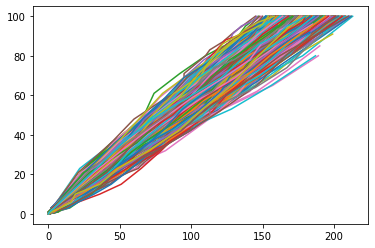

99.594


In [960]:
d=0
for j in range(1000):
    a,b,c=solveque(marks,model,T)
    n=len(b)
    d=d+a[n-1]
    plt.plot(b,a)
plt.show()
print(d/1000)

In [961]:
def leastmarks(marks,model,T):
    b=chooseb(marks,T,0)
    i=len(marks)
    
    m1=[0]
    t1=[0]
    
    p=marks[i-1]
    m=p
    m1.append(p)
    t=model(p,b)
    g=t
    t1.append(t)
    k=i-2
    while(k>=0 and g<=T):
        
            
            p=marks[k]
            m=m+p
            m1.append(m)
            g=g+model(p,b)
            t1.append(g)
            k=k-1
        
    return m1,t1   

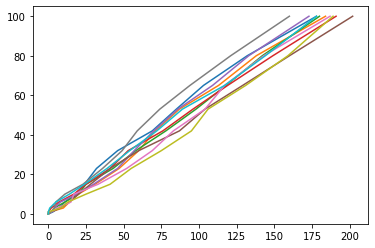

In [962]:
for j in range(10):
    a,b=leastmarks(marks,model,T)
    plt.plot(b,a)
plt.show()

In [963]:
def maxmarks(marks,model,T):
    b=chooseb(marks,T,0)
    i=len(marks)
    
    m1=[0]
    t1=[0]
    
    p=marks[0]
    m=p
    m1.append(p)
    t=model(p,b)
    g=t
    t1.append(t)
    k=1
    while(k<i and g<=T):
            p=marks[k]
            m=m+p
            m1.append(m)
            g=g+model(p,b)
            t1.append(g)
            k=k+1
        
    return m1,t1

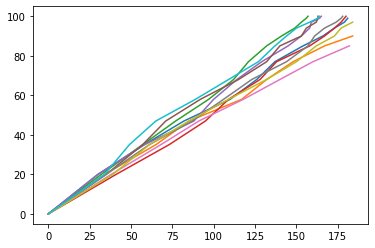

In [964]:
for j in range(10):
    a,b=maxmarks(marks,model,T)
    plt.plot(b,a)
plt.show()

In [965]:
import random

def randommarks(marks,model,T):
    b=chooseb(marks,T,0)
    i=len(marks)
    marks1=random.sample(marks,len(marks))
    p=marks1[0]
    m=p
    m1=[]
    t1=[]
    m1.append(m)
    t=model(p,b)
    g=t
    t1.append(g)
    j=1
    while(j<i and g<=T):
        p=marks1[j]
        m=m+p
        m1.append(m)
        t=model(p,b)
        g=g+t
        g=g
        t1.append(g)
        j=j+1
    return m1,t1

In [966]:
T=180
marks=[20,15,12,11,10,9,8,5,4,3,2,1]

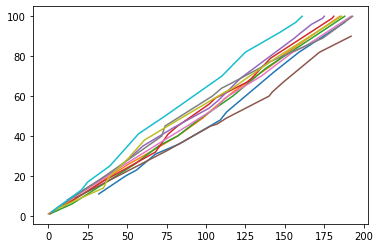

In [967]:
for j in range(10):
    a,b=randommarks(marks,model,T)
    plt.plot(b,a)
plt.show()


In [968]:
def continuous_cum_rewards(rewards,times,T):
    T1=list(range(0,T+1))
    c=(T+1)*[0]
    n=len(times)
    if times[n-1]>=T:
        for i in range(1,n):
            a1=times[i]
            a2=times[i-1]
            a3=rewards[i-1]
            if(a1<=T and a2<=T):
                for j in range(a2,a1):
                    c[j]=a3
            elif(a2<=T and a1>T):
                for j in range(a2,T+1):
                    c[j]=a3
            else:
                continue
    else:
        for i in range(1,n):
            a1=times[i]
            a2=times[i-1]
            a3=rewards[i-1]
            for j in range(a2,a1):
                c[j]=a3
        for t in range(a1,T+1):
            c[t]=rewards[n-1]
    return T1,c        
    

In [969]:
e,f=continuous_cum_rewards([0,5,7,10,15],[0,20,24,28,29],30)
print(e,f)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30] [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 7, 7, 7, 7, 10, 15, 15]


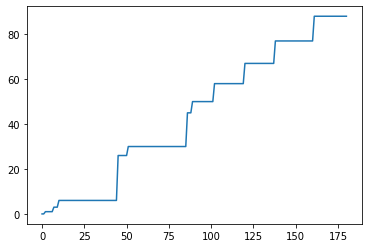

In [970]:
T=180
marks=[20,15,12,11,10,9,8,5,4,3,2,1]
m1,n1,p=solveque(marks,model,T)    
m2,n2=continuous_cum_rewards(m1,n1,T)
plt.plot(m2,n2)
plt.show()

In [971]:
a=[0]*(T+1)

b=[0]*(T+1)

c=[0]*(T+1)

d=[0]*(T+1)



In [972]:
p=20
for i in range(p):
    e1,f1,a4=solveque(marks,model,T)
    e2,f2=leastmarks(marks,model,T)
    e3,f3=maxmarks(marks,model,T)
    e4,f4=randommarks(marks,model,T)
    t_1,a_1=continuous_cum_rewards(e1,f1,T)
    t_2,b_2=continuous_cum_rewards(e2,f2,T)
    t_3,c_3=continuous_cum_rewards(e3,f3,T)
    t_4,d_4=continuous_cum_rewards(e4,f4,T)
    for i in range(T+1):
        a[i]=a[i]+a_1[i]
        b[i]=b[i]+b_2[i]
        c[i]=c[i]+c_3[i]
        d[i]=d[i]+d_4[i]


In [973]:
r1=[]
r2=[]
r3=[]
r4=[]

for i in a:
    r1.append(i/p)

for i in b:
    r2.append(i/p)
    
for i in c:
    r3.append(i/p)

for i in d:
    r4.append(i/p)

t5= list(range(0,T+1)) 
print(r1[180],r2[180],r3[180],r4[180])

93.85 93.0 95.9 92.75


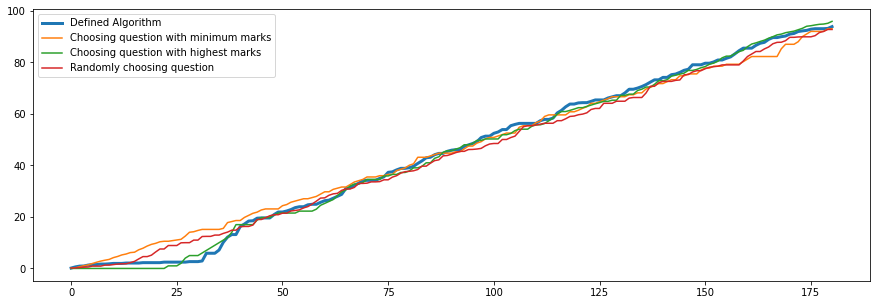

In [974]:
plt.figure(figsize=(15,5))
plt.plot(t5,r1,label="Defined Algorithm",lw=3)
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()

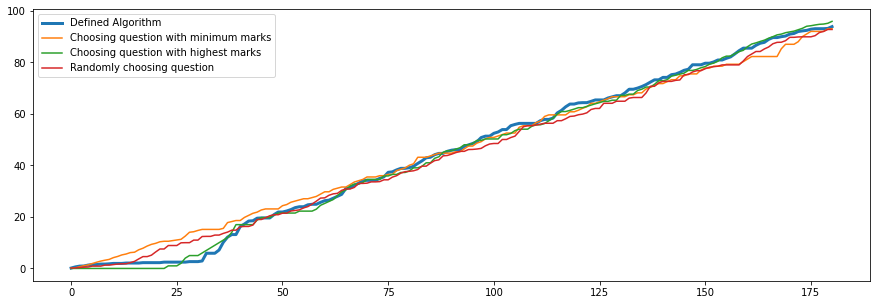

In [975]:
## For bias=-0.1 most of the time choosing highest marks algorithm works better
plt.figure(figsize=(15,5))
plt.plot(t5,r1,label="Defined Algorithm",lw=3)
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()

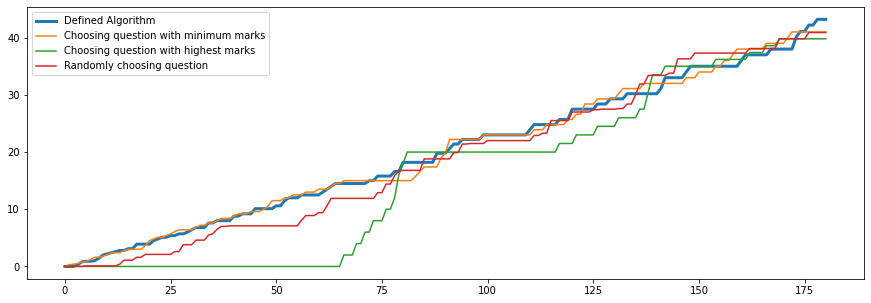

In [602]:
## For bias=2 our defined algorithm works better

plt.figure(figsize=(15,5))
plt.plot(t5,r1,label="Defined Algorithm",lw=3)
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()

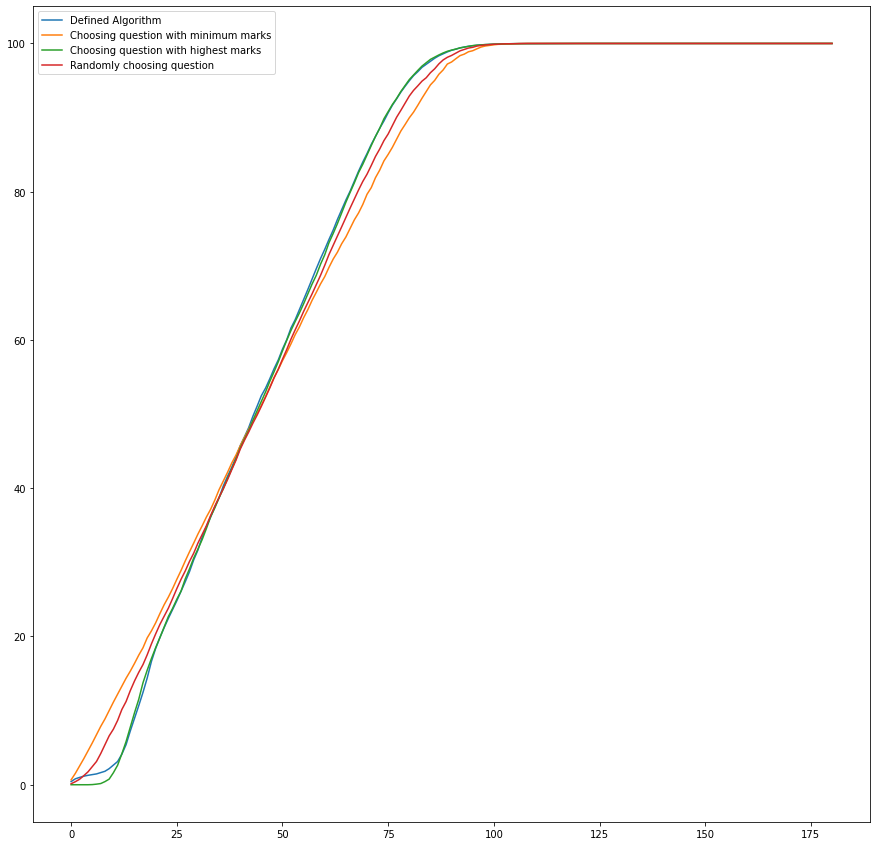

In [554]:
plt.figure(figsize=(15,15))
plt.plot(t5,r1,label="Defined Algorithm")
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()

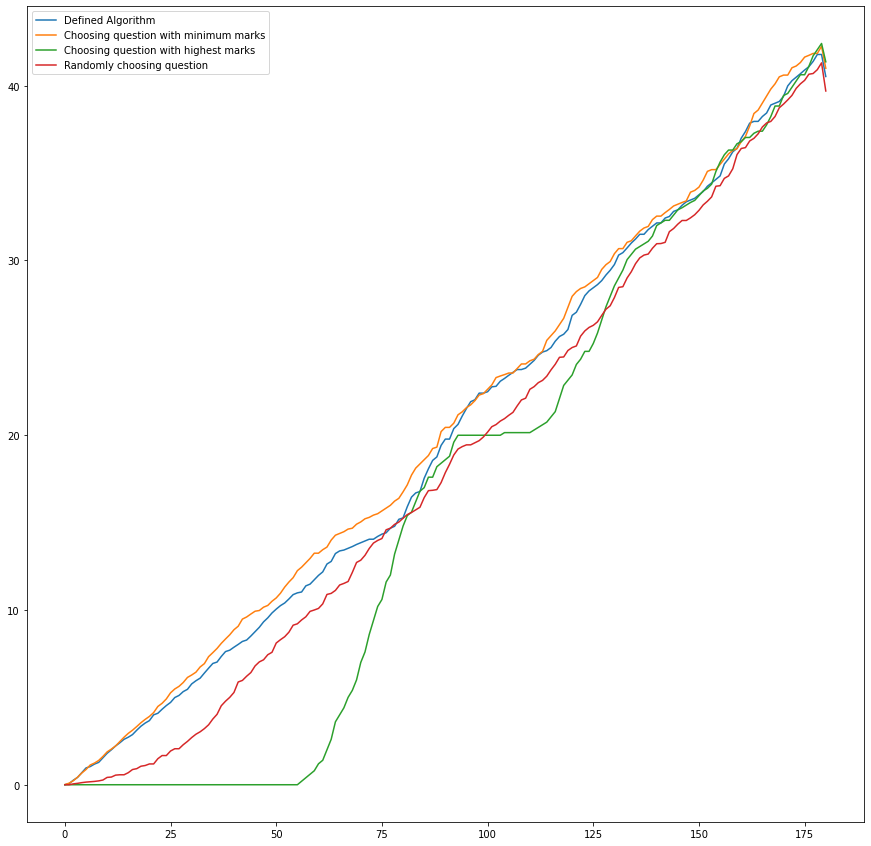

In [436]:
plt.figure(figsize=(15,15))
plt.plot(t5,r1,label="Defined Algorithm")
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()

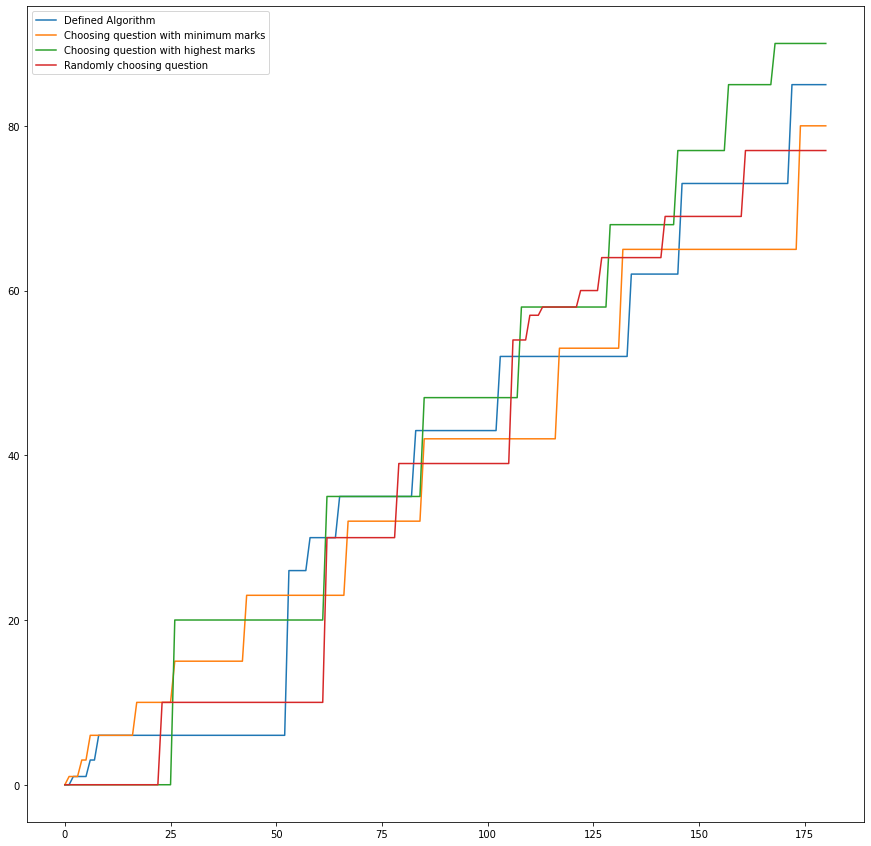

In [416]:
plt.figure(figsize=(15,15))
plt.plot(t5,r1,label="Defined Algorithm")
plt.plot(t5,r2,label="Choosing question with minimum marks")
plt.plot(t5,r3,label="Choosing question with highest marks")
plt.plot(t5,r4,label="Randomly choosing question")
plt.legend()
plt.show()